### Dataset link: https://www.kaggle.com/c/data-science-bowl-2018/data

In [2]:
# Import libraries

import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage import io
import tifffile as tiff
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

ROOT_DIR = os.path.abspath("../")
DATASET_NAME = "DSB2018"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_NAME)
print(os.listdir(DATASET_PATH))

#Data tree
# stage1_train

['stage1_train']


In [3]:
TRAIN_PATH = os.path.join(DATASET_PATH, "stage1_train/")
# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
print(len(train_ids))

670


In [4]:
# set some parameters
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

# initiailize empty numpy array
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

print('Getting and resizing train images and masks ... ')

# go over the training set dirs
for n, id_ in enumerate(train_ids):
    '''training set conssits of raw images and their seperate masks
    '''
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # add image in training set
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        # stitch all the masks together to one mask
        mask = np.maximum(mask, mask_)
    # add the masks in training set
    Y_train[n] = mask
    
# Conver boolean mask to int mask(0's and 1's)
Y_train = Y_train * 1
X_train.shape, Y_train.shape

Getting and resizing train images and masks ... 


((670, 256, 256, 3), (670, 256, 256, 1))

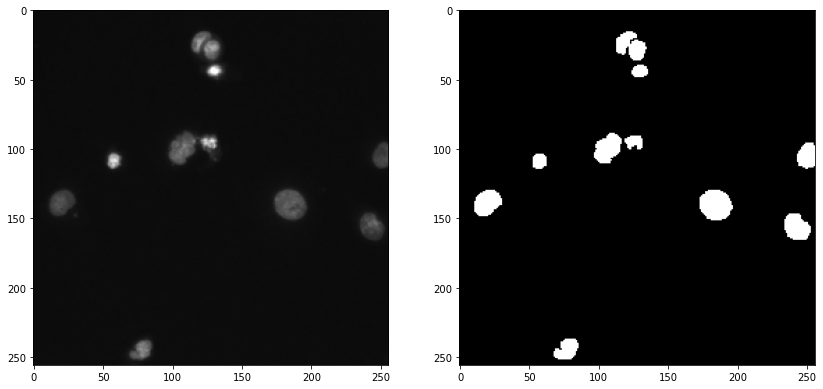

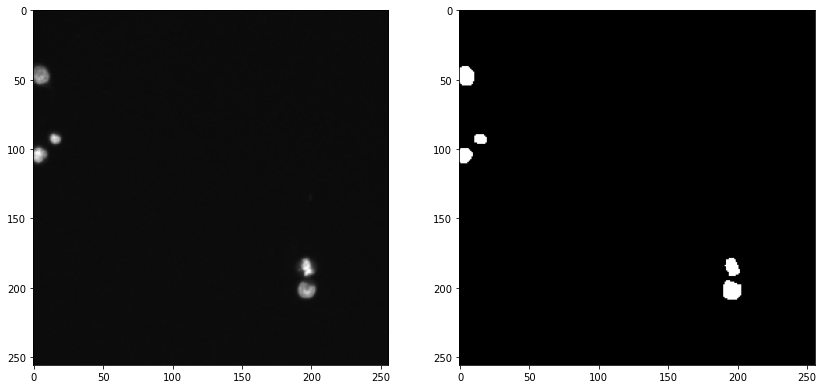

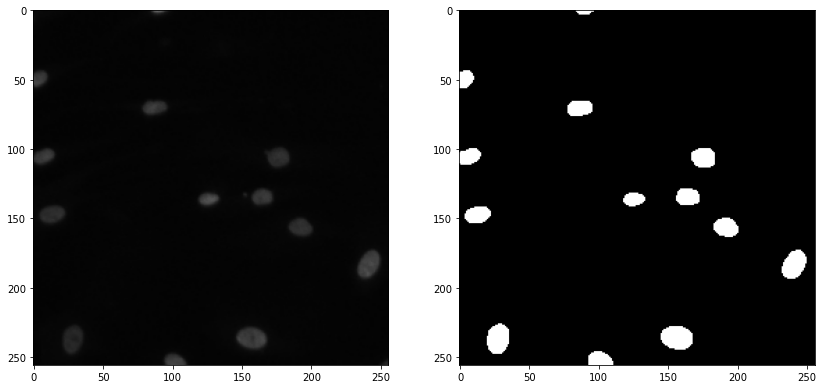

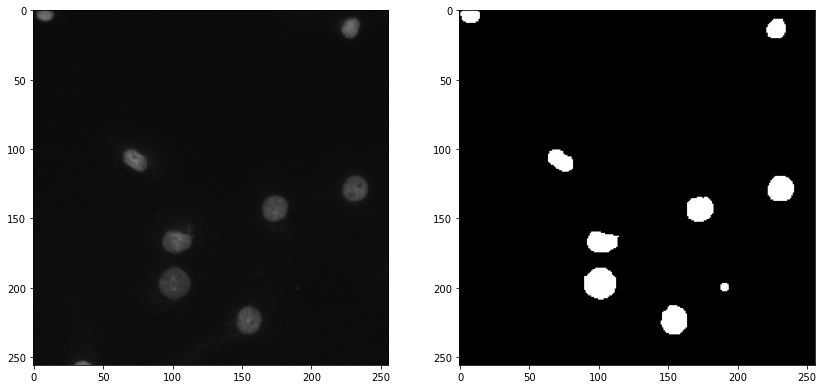

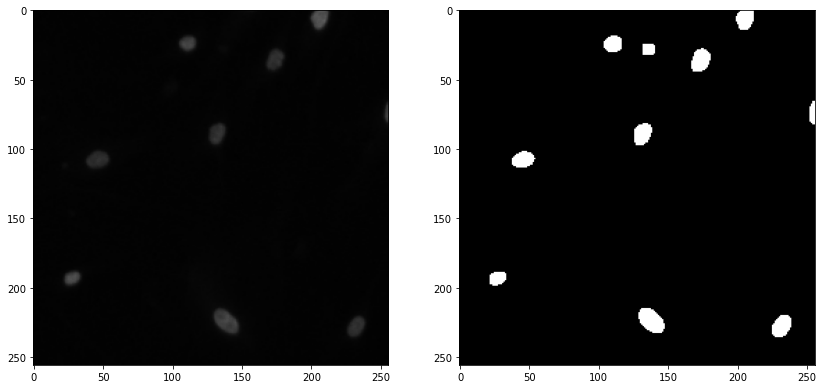

In [5]:
for img, mask in zip(X_train[:5], Y_train[:5]):
    
    mask = np.squeeze(mask, axis=-1) # change to H, W
    
    
    fig,_ = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
    fig.axes[0].imshow(img)
    fig.axes[1].imshow(mask, cmap='gray')
    plt.show()

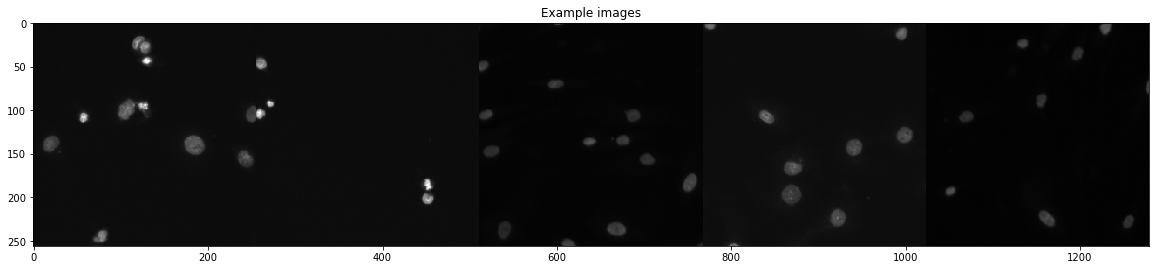

In [6]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.title("Example images")
plt.figsize=(14,12)
plt.imshow(np.concatenate(X_train[:5].transpose((0,1,2,3)),axis=1), interpolation='none')

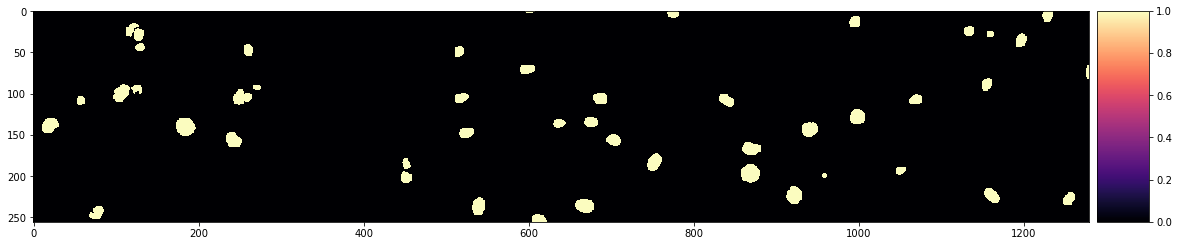

In [7]:
fig = plt.figure(1, figsize=(20, 5))
ax = plt.gca()
im = ax.imshow(np.concatenate(Y_train[:5,:,:,0],axis=1), cmap='magma', interpolation='none') # cmap='bwr'
divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)

In [8]:
from skimage.segmentation import mark_boundaries, find_boundaries

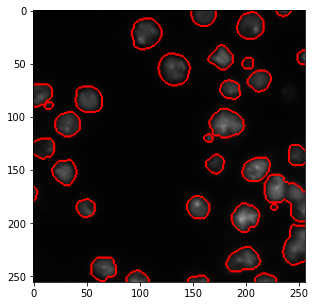

In [9]:
ct = 10
edges_pz = mark_boundaries(X_train[ct], Y_train[ct].squeeze().astype(np.int),color=(1,0,0), mode='thin')
plt.imshow(edges_pz)

In [10]:
X_train.shape, Y_train.shape

((670, 256, 256, 3), (670, 256, 256, 1))

In [11]:
np.save("{}/DSB2018_images.npy".format(DATASET_PATH), X_train)
np.save("{}/DSB2018_mask.npy".format(DATASET_PATH), Y_train)